<a href="https://colab.research.google.com/github/Moin199/Moin199.github.io/blob/master/Keras_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/cancer_classification.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


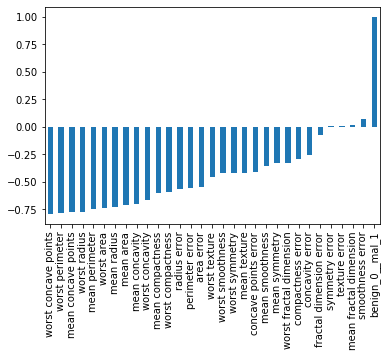

In [ ]:
df.corr()['benign_0__mal_1'].sort_values().plot('bar')

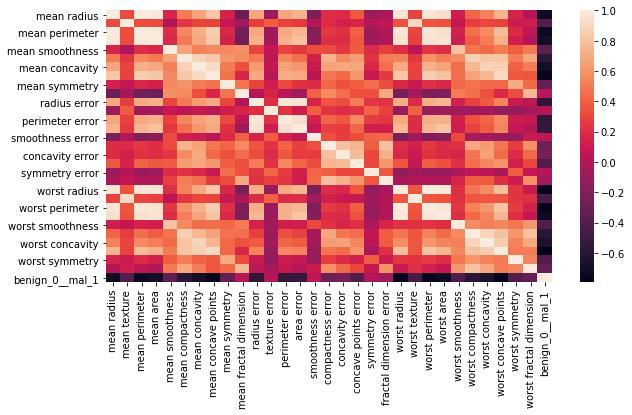

In [ ]:
 plt.figure(figsize=(10,5))
 sns.heatmap(df.corr())

In [ ]:
x=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
x_train=scaler.fit_transform(x_train)


In [ ]:
x_test=scaler.transform(x_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
x_train.shape

(426, 30)

In [ ]:
model.add(Dense(30,'relu'))
model.add(Dense(15,'relu'))
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [ ]:
model.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6924 - val_loss: 0.6680
Epoch 2/600
426/426 [==============================] - 0s 79us/sample - loss: 0.6464 - val_loss: 0.6279
Epoch 3/600
426/426 [==============================] - 0s 74us/sample - loss: 0.6068 - val_loss: 0.5843
Epoch 4/600
426/426 [==============================] - 0s 68us/sample - loss: 0.5663 - val_loss: 0.5389
Epoch 5/600
426/426 [==============================] - 0s 74us/sample - loss: 0.5242 - val_loss: 0.4926
Epoch 6/600
426/426 [==============================] - 0s 78us/sample - loss: 0.4820 - val_loss: 0.4467
Epoch 7/600
426/426 [==============================] - 0s 68us/sample - loss: 0.4385 - val_loss: 0.4006
Epoch 8/600
426/426 [==============================]

In [ ]:
losses=pd.DataFrame(model.history.history)

In [ ]:
losses

,loss,val_loss
0,0.692437,0.667967
1,0.646390,0.627949
2,0.606764,0.584303
3,0.566308,0.538918
4,0.524222,0.492565
...,...,...
595,0.008652,0.106958
596,0.008247,0.114449
597,0.009128,0.107123
598,0.008256,0.108200


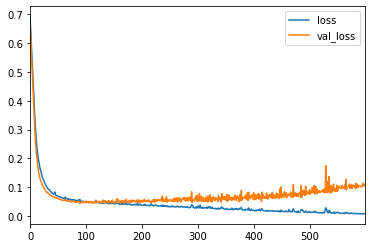

In [ ]:
losses.plot()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model.add(Dense(30,'relu'))
model.add(Dense(15,'relu'))
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')


In [ ]:
stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [ ]:
model.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 120us/sample - loss: 0.1293 - val_loss: 0.2615
Epoch 2/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1345 - val_loss: 0.2061
Epoch 3/600
426/426 [==============================] - 0s 85us/sample - loss: 0.1495 - val_loss: 0.2845
Epoch 4/600
426/426 [==============================] - 0s 95us/sample - loss: 0.1248 - val_loss: 0.2149
Epoch 5/600
426/426 [==============================] - 0s 98us/sample - loss: 0.1270 - val_loss: 0.2354
Epoch 6/600
426/426 [==============================] - 0s 97us/sample - loss: 0.1221 - val_loss: 0.2286
Epoch 7/600
426/426 [==============================] - 0s 94us/sample - loss: 0.1295 - val_loss: 0.2153
Epoch 8/600
426/426 [==============================] - 0s 100us/sample - loss: 0.1269 - val_loss: 0.2399
Epoch 9/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1175 - val_loss: 0.2058
Epoch 10/600
4

In [ ]:
model_loss=pd.DataFrame(model.history.history)

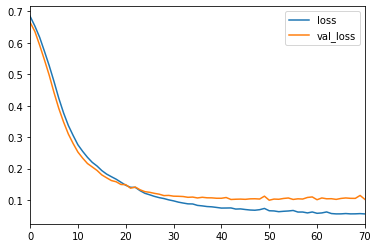

In [ ]:
model_loss.plot()

In [ ]:
from tensorflow.keras.layers import Dropout

In [ ]:
model.add(Dense(30,'relu'))
model.add(Dropout(0.5))
model.add(Dense(15,'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6652 - val_loss: 0.6245
Epoch 2/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6026 - val_loss: 0.5929
Epoch 3/600
426/426 [==============================] - 0s 123us/sample - loss: 0.5902 - val_loss: 0.5733
Epoch 4/600
426/426 [==============================] - 0s 135us/sample - loss: 0.5498 - val_loss: 0.5338
Epoch 5/600
426/426 [==============================] - 0s 115us/sample - loss: 0.5335 - val_loss: 0.5258
Epoch 6/600
426/426 [==============================] - 0s 121us/sample - loss: 0.4979 - val_loss: 0.4950
Epoch 7/600
426/426 [==============================] - 0s 111us/sample - loss: 0.4618 - val_loss: 0.4472
Epoch 8/600
426/426 [==============================] - 0s 120us/sample - loss: 0.4356 - val_loss: 0.4193
Epoch 9/600
426/426 [==============================] - 0s 113us/sample - loss: 0.4124 - val_loss: 0.3984
Epoch 10/60

In [ ]:
model_losses=pd.DataFrame(model.history.history)

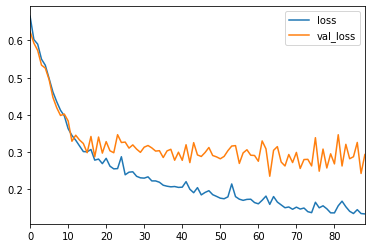

In [ ]:
model_losses.plot()

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(30,'relu'))
model.add(Dropout(0.5))
model.add(Dense(15,'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x_train,y_train,epochs=600,validation_data=(x_test,y_test),callbacks=[stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7105 - val_loss: 0.6817
Epoch 2/600
426/426 [==============================] - 0s 98us/sample - loss: 0.6850 - val_loss: 0.6636
Epoch 3/600
426/426 [==============================] - 0s 108us/sample - loss: 0.6740 - val_loss: 0.6480
Epoch 4/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6553 - val_loss: 0.6348
Epoch 5/600
426/426 [==============================] - 0s 102us/sample - loss: 0.6340 - val_loss: 0.6171
Epoch 6/600
426/426 [==============================] - 0s 90us/sample - loss: 0.6223 - val_loss: 0.5928
Epoch 7/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6071 - val_loss: 0.5654
Epoch 8/600
426/426 [==============================] - 0s 87us/sample - loss: 0.5662 - val_loss: 0.5354
Epoch 9/600
426/426 [==============================] - 0s 88us/sample - loss: 0.5330 - val_loss: 0.4999
Epoch 10/600
426/

In [ ]:
model_losses=pd.DataFrame(model.history.history)

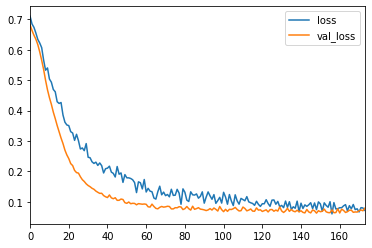

In [ ]:
model_losses.plot()

In [ ]:
predictions=model.predict_classes(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 3 85]]
